In [30]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
import sys, os
sys.path.append("..")
import utils as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Plotting CV splits

In [48]:
cv_splits = [
    # cv 0
    {
        # label: era range
        "train": (1, 795),
        #"val": (820, 935),
        "test": (820, 1059),
    },
    # cv 1
    {
        "train": (1, 533),
        #"val": (556, 671),
        "test": (556, 795),
    },
    # cv 2
    {
        "train": (1, 269),
        #"val": (292, 408),
        "test": (292, 531),
    },
#     # cv 3
#     {
#         "train": (1, 200),
#         "validation": (221, 401),
#         "test": (421, 601),
#     },
#     # cv 4
#     {
#         "train": (1, 200),
#         "validation": (221, 401),
#         "test": (421, 601),
#     },
]

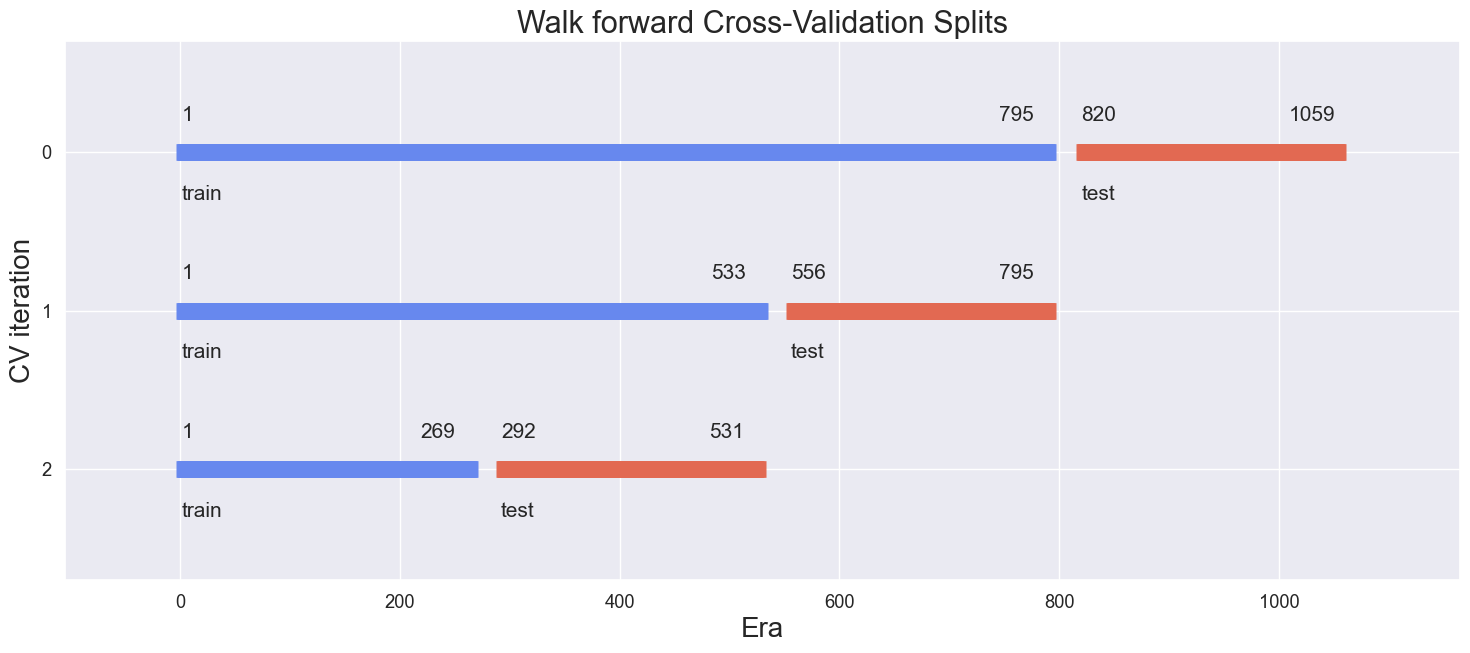

In [50]:
_, ax = plt.subplots(figsize=(18,7))
ut.plot_cv_split(
    cv_splits=cv_splits,
    xlabel="Era",
    linewidth=12,
    always_show_bin_ends=True,
    bin_end_offset=50,
    title="Walk forward Cross-Validation Splits",
    ax=ax,
    annot_fontsize=15,
    title_fontsize=22,
    label_fontsize=20,
);

## 2. Comparing model performance

In [16]:
import pandas as pd
import numpy as np

In [24]:
n = 8
target = np.random.random((n,))*100
pred_df = pd.DataFrame({
    "era": ["era1", "era1", "era2", "era2", "era3", "era3", "era4", "era4"],
    "pred_target_mdl1": target + np.random.random((n,))*15,
    "pred_target_mdl2": target + np.random.random((n,))*10,
    "pred_target_baseline": target + np.random.random((n,))*20,
    "target": target,
})
pred_df.style.bar(color="lightblue")

,era,pred_target_mdl1,pred_target_mdl2,pred_target_baseline,target
0,era1,101.823144,109.705550,119.149949,99.844635
1,era1,32.465314,35.553554,41.066964,31.374652
2,era2,80.262656,74.857781,76.194909,69.429767
3,era2,95.910876,88.247676,97.324990,83.512285
4,era3,42.028894,40.894042,54.377303,35.189952
5,era3,62.766063,58.643608,54.665926,52.746725
6,era4,17.399623,10.975395,12.280191,6.206832
7,era4,107.128531,100.112433,109.595662,97.598627


TypeError: can only concatenate str (not "int") to str

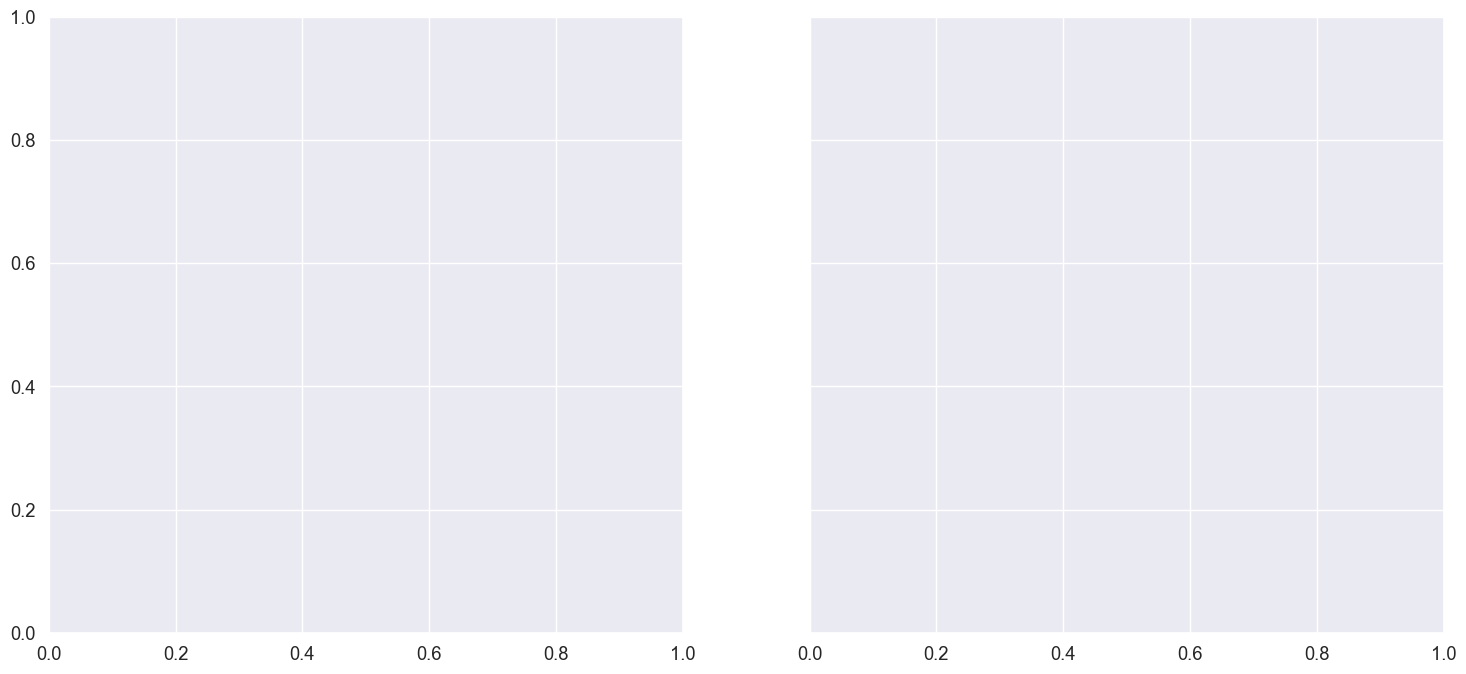

In [25]:
fig, summary_df = ut.compare_models_with_baseline(
    pred_df,
    competitor_predcols=["pred_target_mdl1", "pred_target_mdl2"],
    baseline_col="pred_target_baseline",
    target_col="target",
    to_plot=True,
    plot_erabinsz=2,
    to_refmt_predcols=False,
    era_col="era",
)
ut.fmt_metrics_df(
    summary_df[["corr2", "sharpe", "corr2_prop_increase", "sharpe_prop_increase"]]
)